# Seoul Metro

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [50]:
seoul = folium.Map(location=[37.55, 126.98], zoom_start=12)
seoul

### 1. data

In [51]:
data1 = r"C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Data_TIL\Practice\data\seoul-metro-2021.logs.csv"
data2 = r"C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Data_TIL\Practice\data\seoul-metro-station-info.csv"

df_logs = pd.read_csv(data1)
df_info = pd.read_csv(data2)

##### 1-1. logs

In [52]:
df_logs

,timestamp,station_code,people_in,people_out
0,2021-01-01T05:00:00.000+09:00,150,86,85
1,2021-01-01T06:00:00.000+09:00,150,111,355
2,2021-01-01T07:00:00.000+09:00,150,157,438
3,2021-01-01T08:00:00.000+09:00,150,306,592
4,2021-01-01T09:00:00.000+09:00,150,333,841
...,...,...,...,...
1941548,2021-12-31T19:00:00.000+09:00,2828,74,263
1941549,2021-12-31T20:00:00.000+09:00,2828,73,145
1941550,2021-12-31T21:00:00.000+09:00,2828,95,209
1941551,2021-12-31T22:00:00.000+09:00,2828,54,138


In [53]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941553 entries, 0 to 1941552
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 59.3+ MB


In [54]:
df_logs.describe()

,station_code,people_in,people_out
count,1.941553e+06,1.941553e+06,1.941553e+06
mean,1.645072e+03,6.651796e+02,6.646055e+02
std,1.171851e+03,9.108079e+02,9.534193e+02
min,1.500000e+02,0.000000e+00,0.000000e+00
25%,3.180000e+02,1.870000e+02,1.930000e+02
50%,2.531000e+03,3.990000e+02,4.010000e+02
75%,2.647000e+03,7.840000e+02,7.660000e+02
max,2.828000e+03,1.553600e+04,1.923700e+04


##### 1-2. info

In [55]:
df_info.head()

,station.code,station.fr_code,line.num,line.name,line.name_sub,line.station_seq,station.name_full,station.name,station.name_chc,station.name_chn,station.name_en,station.name_jp,geo.latitude,geo.longitude,geo.sigungu_code,geo.sigungu_name,geo.addres_road,geo.address_land,geo.phone
0,158,124,1,1호선,지하철1호선,1,청량리(서울시립대입구),청량리|서울시립대입구,祭基洞,祭基洞,Jegidong,チェギドン,37.580178,127.046835,11060,동대문구,서울특별시 동대문구 왕산로 지하205(전농동),서울특별시 동대문구 전농동 620-69 청량리역(1호선),02-6110-1241
1,157,125,1,1호선,지하철1호선,2,제기동,제기동,新設洞,新设洞,Sinseoldong,シンソルトン,37.578103,127.034893,11060,동대문구,서울특별시 동대문구 왕산로 지하93(제기동),서울특별시 동대문구 제기동 65 제기동역(1호선),02-6110-1251
2,156,126,1,1호선,지하철1호선,3,신설동,신설동,東廟앞,东庙,Dongmyo,トンミョアプ,37.575297,127.025087,11060,동대문구,서울특별시 동대문구 왕산로 지하1(신설동),서울특별시 동대문구 신설동 76-5 신설동역(1호선),02-6110-1261
3,159,127,1,1호선,지하철1호선,4,동묘앞,동묘앞,淸凉里(서울市立大入口),清凉里(首尔市立大学),Cheongnyangni(University of Seoul),チョンニャンニ,37.572627,127.016429,11010,종로구,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),02-6110-1271
4,155,128,1,1호선,지하철1호선,5,동대문,동대문,東大門,东大门,Dongdaemun,トンデムン,37.571420,127.009745,11010,종로구,서울특별시 종로구 종로 지하302(창신동),서울특별시 종로구 창신동 492-1 동대문역(1호선),02-6110-1281


In [56]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station.code       285 non-null    int64  
 1   station.fr_code    285 non-null    object 
 2   line.num           285 non-null    int64  
 3   line.name          285 non-null    object 
 4   line.name_sub      285 non-null    object 
 5   line.station_seq   285 non-null    int64  
 6   station.name_full  285 non-null    object 
 7   station.name       285 non-null    object 
 8   station.name_chc   285 non-null    object 
 9   station.name_chn   285 non-null    object 
 10  station.name_en    285 non-null    object 
 11  station.name_jp    285 non-null    object 
 12  geo.latitude       285 non-null    float64
 13  geo.longitude      285 non-null    float64
 14  geo.sigungu_code   285 non-null    int64  
 15  geo.sigungu_name   285 non-null    object 
 16  geo.addres_road    285 non

In [57]:
df_info.describe()

,station.code,line.num,line.station_seq,geo.latitude,geo.longitude,geo.sigungu_code
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,1649.329825,4.677193,23.298246,37.545386,127.001578,12752.063158
std,1173.792150,2.017792,19.260597,0.048172,0.095315,5399.851744
min,150.000000,1.000000,1.000000,37.432130,126.720548,11010.000000
25%,319.000000,3.000000,9.000000,37.506207,126.936893,11050.000000
50%,2532.000000,5.000000,20.000000,37.547716,127.010655,11140.000000
75%,2647.000000,6.000000,32.000000,37.571420,127.070230,11230.000000
max,2828.000000,8.000000,104.000000,37.700109,127.223100,31180.000000


### 2. preprocessing, visualization

##### 2-1. in, out people

In [58]:
df_logs_group = df_logs.groupby("station_code")[["people_in", "people_out"]].sum()
df_logs_group

,people_in,people_out
station_code,,
150,12697273,12109991
151,5997344,6030491
152,9638952,9284693
153,7704599,7090896
154,6651283,6609055
...,...,...
2824,3206211,3097722
2825,1395919,1495603
2826,1614590,1475010


In [59]:
df_info_geo = df_info[["station.code", "geo.latitude", "geo.longitude"]]
df_info_geo['station.code']

0       158
1       157
2       156
3       159
4       155
       ... 
280    2823
281    2824
282    2825
283    2826
284    2827
Name: station.code, Length: 285, dtype: int64

In [60]:
df_info_geo

,station.code,geo.latitude,geo.longitude
0,158,37.580178,127.046835
1,157,37.578103,127.034893
2,156,37.575297,127.025087
3,159,37.572627,127.016429
4,155,37.571420,127.009745
...,...,...,...
280,2823,37.451535,127.159816
281,2824,37.445210,127.156866
282,2825,37.440918,127.147564
283,2826,37.437428,127.140722


In [61]:
# df_info_geo = df_info_geo.rename(columns={"station.code": "station_code"})
df_info_geo.set_index("station.code", inplace=True)
df_info_geo

,geo.latitude,geo.longitude
station.code,,
158,37.580178,127.046835
157,37.578103,127.034893
156,37.575297,127.025087
159,37.572627,127.016429
155,37.571420,127.009745
...,...,...
2823,37.451535,127.159816
2824,37.445210,127.156866
2825,37.440918,127.147564


In [62]:
df_joined = df_logs_group.join(df_info_geo)
df_joined

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,12697273,12109991,37.554648,126.972559
151,5997344,6030491,37.564718,126.977108
152,9638952,9284693,37.570161,126.982923
153,7704599,7090896,37.571607,126.991806
154,6651283,6609055,37.570926,127.001849
...,...,...,...,...
2824,3206211,3097722,37.445210,127.156866
2825,1395919,1495603,37.440918,127.147564
2826,1614590,1475010,37.437428,127.140722


In [63]:
seoul_in = folium.Map(locaion=[37.55, 126.98], zoom_start=12)
seoul_in

In [64]:
seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data = df_joined[["geo.latitude", "geo.longitude", "people_in"]]).add_to(seoul_in)

seoul_in

In [65]:
seoul_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data = df_joined[["geo.latitude", "geo.longitude", "people_out"]]).add_to(seoul_out)

seoul_out

##### 2-2. commute time in, out people

In [66]:
df_logs["timestamp"] = pd.to_datetime(df_logs["timestamp"])
df_logs["hour"] = df_logs["timestamp"].dt.hour
df_selected = df_logs[["station_code", "people_in", "people_out", "hour"]]
df_logs_gw = df_selected[(df_selected["hour"] >= 5) & (df_selected["hour"] <= 9)]
df_logs_ow = df_selected[(df_selected["hour"] > 17) & (df_selected["hour"] <= 21)]

In [67]:
df_logs_gw_group = df_logs_gw.groupby("station_code")[["people_in", "people_out"]].sum()
df_logs_gw_group

,people_in,people_out
station_code,,
150,1767821,4766393
151,308884,3572658
152,340424,5025107
153,347838,2012388
154,311634,2472237
...,...,...
2824,1386777,568976
2825,517928,221387
2826,673132,238127


In [68]:
df_logs_ow_group = df_logs_ow.groupby("station_code")[["people_in", "people_out"]].sum()
df_logs_ow_group

,people_in,people_out
station_code,,
150,4372481,1999765
151,2898439,371844
152,4548422,745474
153,2687579,648428
154,2225257,464201
...,...,...
2824,491431,1125478
2825,213945,503432
2826,205804,489036


In [69]:
df_info_geo

,geo.latitude,geo.longitude
station.code,,
158,37.580178,127.046835
157,37.578103,127.034893
156,37.575297,127.025087
159,37.572627,127.016429
155,37.571420,127.009745
...,...,...
2823,37.451535,127.159816
2824,37.445210,127.156866
2825,37.440918,127.147564


In [70]:
df_merged_gw = df_logs_gw_group.join(df_info_geo)
df_merged_ow = df_logs_ow_group.join(df_info_geo)

In [71]:
df_merged_gw

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,1767821,4766393,37.554648,126.972559
151,308884,3572658,37.564718,126.977108
152,340424,5025107,37.570161,126.982923
153,347838,2012388,37.571607,126.991806
154,311634,2472237,37.570926,127.001849
...,...,...,...,...
2824,1386777,568976,37.445210,127.156866
2825,517928,221387,37.440918,127.147564
2826,673132,238127,37.437428,127.140722


In [72]:
df_merged_ow

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,4372481,1999765,37.554648,126.972559
151,2898439,371844,37.564718,126.977108
152,4548422,745474,37.570161,126.982923
153,2687579,648428,37.571607,126.991806
154,2225257,464201,37.570926,127.001849
...,...,...,...,...
2824,491431,1125478,37.445210,127.156866
2825,213945,503432,37.440918,127.147564
2826,205804,489036,37.437428,127.140722


In [73]:
seoul_gw_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data = df_merged_gw[["geo.latitude", "geo.longitude", "people_in"]]).add_to(seoul_gw_in)

seoul_gw_in

In [74]:
seoul_gw_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data = df_merged_gw[["geo.latitude", "geo.longitude", "people_out"]]).add_to(seoul_gw_out)

seoul_gw_out

In [75]:
seoul_ow_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data = df_merged_ow[["geo.latitude", "geo.longitude", "people_in"]]).add_to(seoul_ow_in)

seoul_ow_in

In [76]:
seoul_ow_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data = df_merged_ow[["geo.latitude", "geo.longitude", "people_out"]]).add_to(seoul_ow_out)

seoul_ow_out

##### 2-3. lunch time in, out people

In [77]:
df_logs_lunch = df_logs[(df_logs["hour"] >= 11) & (df_logs["hour"] <= 14)]
df_logs_lunch_group = df_logs_lunch.groupby("station_code")[["people_in", "people_out"]].sum()
df_logs_lunch_group

,people_in,people_out
station_code,,
150,2505050,2386392
151,824481,1122552
152,1414527,1829519
153,1848245,2472974
154,1652295,2041594
...,...,...
2824,604018,448206
2825,298017,277076
2826,339413,271084


In [78]:
df_merged_lunch = df_logs_lunch_group.join(df_info_geo)
df_merged_lunch

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,2505050,2386392,37.554648,126.972559
151,824481,1122552,37.564718,126.977108
152,1414527,1829519,37.570161,126.982923
153,1848245,2472974,37.571607,126.991806
154,1652295,2041594,37.570926,127.001849
...,...,...,...,...
2824,604018,448206,37.445210,127.156866
2825,298017,277076,37.440918,127.147564
2826,339413,271084,37.437428,127.140722


In [79]:
seoul_lunch_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data=df_merged_lunch[["geo.latitude", "geo.longitude", "people_in"]]).add_to(seoul_lunch_in)

seoul_lunch_in

In [80]:
seoul_lunch_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

HeatMap(data=df_merged_lunch[["geo.latitude", "geo.longitude", "people_out"]]).add_to(seoul_lunch_out)

seoul_lunch_out

In [81]:
df_merged_lunch

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,2505050,2386392,37.554648,126.972559
151,824481,1122552,37.564718,126.977108
152,1414527,1829519,37.570161,126.982923
153,1848245,2472974,37.571607,126.991806
154,1652295,2041594,37.570926,127.001849
...,...,...,...,...
2824,604018,448206,37.445210,127.156866
2825,298017,277076,37.440918,127.147564
2826,339413,271084,37.437428,127.140722


In [82]:
# 점심시간 250만 명 이상이 나가는 역

df_merged_lunch_over250 = df_merged_lunch[df_merged_lunch["people_out"] > 2_500_000]  # 숫자 _
df_merged_lunch_over250

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
216,3611907,4105618,37.513950,127.102234
219,2036127,2846899,37.508844,127.063160
220,2442474,2578990,37.504503,127.049008
221,1850990,2501529,37.500622,127.036456
222,3967332,5009410,37.497175,127.027926
230,3521209,2566676,37.484201,126.929715
234,2719979,2657333,37.508725,126.891295
239,2427533,4667215,37.557192,126.925381
329,3004987,3703051,37.504810,127.004943


In [83]:
seoul_lunch_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

for _, row in df_merged_lunch_over250.iterrows():
    folium.Circle(location = [row["geo.latitude"], row["geo.longitude"]], 
                  radius=(row['people_out']/10000), color='red', fill="red").add_to(seoul_lunch_in)
seoul_lunch_in

In [84]:
for _, row in df_merged_lunch_over250.iterrows():
    print(row)

people_in        3.611907e+06
people_out       4.105618e+06
geo.latitude     3.751395e+01
geo.longitude    1.271022e+02
Name: 216, dtype: float64
people_in        2.036127e+06
people_out       2.846899e+06
geo.latitude     3.750884e+01
geo.longitude    1.270632e+02
Name: 219, dtype: float64
people_in        2.442474e+06
people_out       2.578990e+06
geo.latitude     3.750450e+01
geo.longitude    1.270490e+02
Name: 220, dtype: float64
people_in        1.850990e+06
people_out       2.501529e+06
geo.latitude     3.750062e+01
geo.longitude    1.270365e+02
Name: 221, dtype: float64
people_in        3.967332e+06
people_out       5.009410e+06
geo.latitude     3.749717e+01
geo.longitude    1.270279e+02
Name: 222, dtype: float64
people_in        3.521209e+06
people_out       2.566676e+06
geo.latitude     3.748420e+01
geo.longitude    1.269297e+02
Name: 230, dtype: float64
people_in        2.719979e+06
people_out       2.657333e+06
geo.latitude     3.750872e+01
geo.longitude    1.268913e+02
Name

[참고] 영상이나 사진도 사용 가능

In [85]:
temp = folium.Map(location=[37.513950, 127.102234], zoom_start=12)

folium.Marker([37.513950, 127.102234],
              popup='<iframe width="560" height="315" src="https://www.youtube.com/embed/dpwTOQri42s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
              tooltip="잠실역 입구").add_to(temp)
temp

##### 2-4. Non commute time in, out people
- marker cluster

In [86]:
df_info

,station.code,station.fr_code,line.num,line.name,line.name_sub,line.station_seq,station.name_full,station.name,station.name_chc,station.name_chn,station.name_en,station.name_jp,geo.latitude,geo.longitude,geo.sigungu_code,geo.sigungu_name,geo.addres_road,geo.address_land,geo.phone
0,158,124,1,1호선,지하철1호선,1,청량리(서울시립대입구),청량리|서울시립대입구,祭基洞,祭基洞,Jegidong,チェギドン,37.580178,127.046835,11060,동대문구,서울특별시 동대문구 왕산로 지하205(전농동),서울특별시 동대문구 전농동 620-69 청량리역(1호선),02-6110-1241
1,157,125,1,1호선,지하철1호선,2,제기동,제기동,新設洞,新设洞,Sinseoldong,シンソルトン,37.578103,127.034893,11060,동대문구,서울특별시 동대문구 왕산로 지하93(제기동),서울특별시 동대문구 제기동 65 제기동역(1호선),02-6110-1251
2,156,126,1,1호선,지하철1호선,3,신설동,신설동,東廟앞,东庙,Dongmyo,トンミョアプ,37.575297,127.025087,11060,동대문구,서울특별시 동대문구 왕산로 지하1(신설동),서울특별시 동대문구 신설동 76-5 신설동역(1호선),02-6110-1261
3,159,127,1,1호선,지하철1호선,4,동묘앞,동묘앞,淸凉里(서울市立大入口),清凉里(首尔市立大学),Cheongnyangni(University of Seoul),チョンニャンニ,37.572627,127.016429,11010,종로구,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),02-6110-1271
4,155,128,1,1호선,지하철1호선,5,동대문,동대문,東大門,东大门,Dongdaemun,トンデムン,37.571420,127.009745,11010,종로구,서울특별시 종로구 종로 지하302(창신동),서울특별시 종로구 창신동 492-1 동대문역(1호선),02-6110-1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2823,823,8,8호선,지하철8호선,14,남한산성입구(성남법원.검찰청),남한산성입구|성남법원|검찰청,南漢山城入口(城南法院檢察廳),南汉山城(城南法院·检察厅),Namhansanseong(Seongnam Court & Prosecutors' O...,ナムハンサンソンイック,37.451535,127.159816,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하445(단대동),경기도 성남시 수정구 단대동 96 남한산성입구역(8호선),02-6311-8231
281,2824,824,8,8호선,지하철8호선,15,단대오거리,단대오거리,丹垈오거리,丹垈五岔路口,Dandaeogeori,タンデオゴリ,37.445210,127.156866,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하365(신흥동),경기도 성남시 수정구 신흥동 2467 단대오거리역(8호선),02-6311-8241
282,2825,825,8,8호선,지하철8호선,16,신흥,신흥,新興,新兴,Sinheung,シンフン,37.440918,127.147564,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하280(신흥동),경기도 성남시 수정구 신흥동 2467 신흥역(8호선),02-6311-8251
283,2826,826,8,8호선,지하철8호선,17,수진,수진,壽進,寿进,Sujin,スジン,37.437428,127.140722,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하200(수진동),경기도 성남시 수정구 수진동 2205-1 수진역(8호선),02-6311-8261


In [87]:
df_logs_ngw = df_logs[((df_logs["hour"] > 9) & (df_logs["hour"] < 17)) |
                      ((df_logs["hour"] > 21) & (df_logs["hour"] <= 23))]
df_logs_ngw

,timestamp,station_code,people_in,people_out,hour
5,2021-01-01 10:00:00+09:00,150,416,747,10
6,2021-01-01 11:00:00+09:00,150,579,625,11
7,2021-01-01 12:00:00+09:00,150,737,838,12
8,2021-01-01 13:00:00+09:00,150,696,788,13
9,2021-01-01 14:00:00+09:00,150,674,791,14
...,...,...,...,...,...
1941543,2021-12-31 14:00:00+09:00,2828,198,228,14
1941544,2021-12-31 15:00:00+09:00,2828,227,213,15
1941545,2021-12-31 16:00:00+09:00,2828,218,341,16
1941551,2021-12-31 22:00:00+09:00,2828,54,138,22


In [88]:
df_logs_ngw_group = df_logs_ngw.groupby("station_code")[["people_in", "people_out"]].sum()
df_logs_ngw_group

,people_in,people_out
station_code,,
150,5197461,4609375
151,2025065,1901370
152,3486193,3144498
153,3853828,4077815
154,3296117,3393574
...,...,...
2824,1124122,1160074
2825,569074,641324
2826,636119,636287


In [89]:
df_merged_ngw = df_logs_ngw_group.join(df_info_geo)
df_merged_ngw

,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,
150,5197461,4609375,37.554648,126.972559
151,2025065,1901370,37.564718,126.977108
152,3486193,3144498,37.570161,126.982923
153,3853828,4077815,37.571607,126.991806
154,3296117,3393574,37.570926,127.001849
...,...,...,...,...
2824,1124122,1160074,37.445210,127.156866
2825,569074,641324,37.440918,127.147564
2826,636119,636287,37.437428,127.140722


In [90]:
df_merged_ngw[["geo.latitude", "geo.longitude"]].duplicated().sum()

36

- 중복된 자료가 있음
- 같은 위, 경도 데이터끼리 groupby해서 사용하면 해결 가능

In [91]:
seoul_ngw_in = folium.Map(location=[37.55, 126.98], zoom_start=12)

for _, row in df_merged_ngw.iterrows():
    folium.Circle(location = [row["geo.latitude"], row["geo.longitude"]],
                  radius = (row["people_in"]/10000), color='red', fill='red').add_to(seoul_ngw_in)

seoul_ngw_in

- 강남, 잠실, 신림이 출·퇴근 시간 이외에 많은 승차객

In [92]:
seoul_ngw_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

for _, row in df_merged_ngw.iterrows():
    folium.Circle(location = [row["geo.latitude"], row["geo.longitude"]],
                  radius = (row["people_out"]/10000), color='red', fill='red').add_to(seoul_ngw_out)

seoul_ngw_out

- 홍대입구, 강남, 잠실이 출·퇴근 시간 이외에 많은 하차객

- 홍대입구의 하차객이 눈에 띄게 늘어남

##### 2-5. 구별 유동인구 순위
- 구별 가장 많은 유동인구가 있는 지하철역 선정

In [93]:
df_info_geo_add = df_info[["station.code", "line.num", "geo.latitude", 
                           "geo.longitude", "geo.sigungu_name", "station.name_full"]]
df_info_geo_add

,station.code,line.num,geo.latitude,geo.longitude,geo.sigungu_name,station.name_full
0,158,1,37.580178,127.046835,동대문구,청량리(서울시립대입구)
1,157,1,37.578103,127.034893,동대문구,제기동
2,156,1,37.575297,127.025087,동대문구,신설동
3,159,1,37.572627,127.016429,종로구,동묘앞
4,155,1,37.571420,127.009745,종로구,동대문
...,...,...,...,...,...,...
280,2823,8,37.451535,127.159816,성남시수정구,남한산성입구(성남법원.검찰청)
281,2824,8,37.445210,127.156866,성남시수정구,단대오거리
282,2825,8,37.440918,127.147564,성남시수정구,신흥
283,2826,8,37.437428,127.140722,성남시수정구,수진


In [94]:
df_info_geo_add = df_info_geo_add.set_index('station.code')
df_merged_gu = df_logs_group.join(df_info_geo_add)
df_merged_gu


,people_in,people_out,line.num,geo.latitude,geo.longitude,geo.sigungu_name,station.name_full
station_code,,,,,,,
150,12697273,12109991,1,37.554648,126.972559,중구,서울역
151,5997344,6030491,1,37.564718,126.977108,중구,시청
152,9638952,9284693,1,37.570161,126.982923,종로구,종각
153,7704599,7090896,1,37.571607,126.991806,종로구,종로3가(탑골공원)
154,6651283,6609055,1,37.570926,127.001849,종로구,종로5가
...,...,...,...,...,...,...,...
2824,3206211,3097722,8,37.445210,127.156866,성남시수정구,단대오거리
2825,1395919,1495603,8,37.440918,127.147564,성남시수정구,신흥
2826,1614590,1475010,8,37.437428,127.140722,성남시수정구,수진


In [95]:
df_merged_gu["people_sum"] = df_merged_gu["people_in"] + df_merged_gu["people_out"]
df_merged_gu

,people_in,people_out,line.num,geo.latitude,geo.longitude,geo.sigungu_name,station.name_full,people_sum
station_code,,,,,,,,
150,12697273,12109991,1,37.554648,126.972559,중구,서울역,24807264
151,5997344,6030491,1,37.564718,126.977108,중구,시청,12027835
152,9638952,9284693,1,37.570161,126.982923,종로구,종각,18923645
153,7704599,7090896,1,37.571607,126.991806,종로구,종로3가(탑골공원),14795495
154,6651283,6609055,1,37.570926,127.001849,종로구,종로5가,13260338
...,...,...,...,...,...,...,...,...
2824,3206211,3097722,8,37.445210,127.156866,성남시수정구,단대오거리,6303933
2825,1395919,1495603,8,37.440918,127.147564,성남시수정구,신흥,2891522
2826,1614590,1475010,8,37.437428,127.140722,성남시수정구,수진,3089600


In [109]:
sigungu_list = df_merged_gu["geo.sigungu_name"].unique().tolist()
sigungu_list
df_merged_gu_max = pd.DataFrame()

for name in sigungu_list:
    temp_df = df_merged_gu[df_merged_gu["geo.sigungu_name"] == name]
    temp_df_max = temp_df[temp_df["people_sum"] == temp_df["people_sum"].max()]
    df_merged_gu_max = pd.concat([df_merged_gu_max, temp_df_max]) 
    
df_merged_gu_max.reset_index(inplace=True)
df_merged_gu_max.drop('index', axis=1, inplace=True)
df_merged_gu_max = df_merged_gu_max.sort_values('people_sum', ascending=False)
df_merged_gu_max

,station_code,people_in,people_out,line.num,geo.latitude,geo.longitude,geo.sigungu_name,station.name_full,people_sum
6,222,24426240,24021448,2,37.497175,127.027926,강남구,강남,48447688
5,216,20585020,20281017,2,37.513950,127.102234,송파구,잠실(송파구청),40866037
9,230,19321321,18777846,2,37.484201,126.929715,관악구,신림,38099167
10,232,17582086,17609722,2,37.485266,126.901401,구로구,구로디지털단지,35191808
12,239,16594753,17288073,2,37.557192,126.925381,마포구,홍대입구,33882826
7,329,13313995,13075608,3,37.504810,127.004943,서초구,고속터미널,26389603
27,2748,12884974,12750775,7,37.481072,126.882343,금천구,가산디지털단지,25635749
0,150,12697273,12109991,1,37.554648,126.972559,중구,서울역,24807264
8,226,11069141,12067782,2,37.476530,126.981685,동작구,사당,23136923
16,311,11498063,10880722,3,37.619001,126.921008,은평구,연신내,22378785


In [ ]:
seoul_max = seoul_ngw_out = folium.Map(location=[37.55, 126.98], zoom_start=12)

for _, row in df_merged_gu_max.iterrows():
    folium.Marker(location=[row["geo.latitude"], row["geo.longitude"]], tooltip=(row["geo.sigungu_name"] + ', ' + str(row["station.name_full"]) + ', ' + str(row["people_sum"])), 
                  icon=folium.Icon(color="pink")).add_to(seoul_max)
    folium.CircleMarker(location=[row["geo.latitude"], row["geo.longitude"]], radius=(row["people_sum"]/1500000), 
                        color='red', fill='sky').add_to(seoul_max)
    
seoul_max

##### 2-6. 호선별 유동인구
- day

In [ ]:
df_logs_group

,people_in,people_out
station_code,,
150,12697273,12109991
151,5997344,6030491
152,9638952,9284693
153,7704599,7090896
154,6651283,6609055
...,...,...
2824,3206211,3097722
2825,1395919,1495603
2826,1614590,1475010


In [ ]:
df_info_geo_add

,line.num,geo.latitude,geo.longitude,geo.sigungu_name,station.name_full
station.code,,,,,
158,1,37.580178,127.046835,동대문구,청량리(서울시립대입구)
157,1,37.578103,127.034893,동대문구,제기동
156,1,37.575297,127.025087,동대문구,신설동
159,1,37.572627,127.016429,종로구,동묘앞
155,1,37.571420,127.009745,종로구,동대문
...,...,...,...,...,...
2823,8,37.451535,127.159816,성남시수정구,남한산성입구(성남법원.검찰청)
2824,8,37.445210,127.156866,성남시수정구,단대오거리
2825,8,37.440918,127.147564,성남시수정구,신흥


In [ ]:
df_merged_line = df_logs_group.join(df_info_geo_add)
df_merged_line_group = df_merged_line.groupby("line.num")[["people_in", "people_out"]].sum()
df_merged_line_group

,people_in,people_out
line.num,,
1,65252151,63726364
2,393621030,397687890
3,150238390,150009126
4,141636895,142840642
5,185610836,184781048
6,96415145,94873910
7,203821680,201100342
8,54885256,55347485


- 2호선을 가장 많은 승객이 이용

- 선형적인 관계를 띄고 있음을 파악

- 호선별 이용 시간에 따라 분류하면 더욱 세부적으로 파악 가능

##### 2-7. 월별 가장 많은 사람들이 움직인 날의 시간대 Top3 지하철 유동인구 분포
- Holiday

- Festival

In [ ]:
df_logs

,timestamp,station_code,people_in,people_out,hour
0,2021-01-01 05:00:00+09:00,150,86,85,5
1,2021-01-01 06:00:00+09:00,150,111,355,6
2,2021-01-01 07:00:00+09:00,150,157,438,7
3,2021-01-01 08:00:00+09:00,150,306,592,8
4,2021-01-01 09:00:00+09:00,150,333,841,9
...,...,...,...,...,...
1941548,2021-12-31 19:00:00+09:00,2828,74,263,19
1941549,2021-12-31 20:00:00+09:00,2828,73,145,20
1941550,2021-12-31 21:00:00+09:00,2828,95,209,21
1941551,2021-12-31 22:00:00+09:00,2828,54,138,22


In [97]:
df_logs["month"] = df_logs["timestamp"].dt.month
df_logs["day"] = df_logs["timestamp"].dt.day
df_logs["people_sum"] = df_logs["people_in"] + df_logs["people_out"]
df_logs

,timestamp,station_code,people_in,people_out,hour,month,day,people_sum
0,2021-01-01 05:00:00+09:00,150,86,85,5,1,1,171
1,2021-01-01 06:00:00+09:00,150,111,355,6,1,1,466
2,2021-01-01 07:00:00+09:00,150,157,438,7,1,1,595
3,2021-01-01 08:00:00+09:00,150,306,592,8,1,1,898
4,2021-01-01 09:00:00+09:00,150,333,841,9,1,1,1174
...,...,...,...,...,...,...,...,...
1941548,2021-12-31 19:00:00+09:00,2828,74,263,19,12,31,337
1941549,2021-12-31 20:00:00+09:00,2828,73,145,20,12,31,218
1941550,2021-12-31 21:00:00+09:00,2828,95,209,21,12,31,304
1941551,2021-12-31 22:00:00+09:00,2828,54,138,22,12,31,192


In [103]:
df_logs_md_group = df_logs.groupby(["month", "day"])[["people_in", "people_out", "people_sum"]].sum()
df_logs_md_group

people_in  people_out  people_sum
month day                                   
1     1       968534      960036     1928570
      2      1535446     1533715     3069161
      3      1168769     1172821     2341590
      4      3455939     3450914     6906853
      5      3464498     3456386     6920884
...              ...         ...         ...
12    27     3943406     3942509     7885915
      28     4149768     4148042     8297810
      29     4270827     4267144     8537971
      30     4193776     4189212     8382988
      31     3886022     3871419     7757441

[365 rows x 3 columns]

In [108]:
month_li = [i for i in range(1, 13)]

df_month_max_day = pd.DataFrame()
for month in month_li:
    df_month = df_logs_md_group.loc[month]
    df_month_max = df_month[df_month["people_sum"] == df_month["people_sum"].max()]
    df_month_max_day = pd.concat([df_month_max_day, df_month_max])
    
df_month_max_day.reset_index(inplace=True)
df_month_max_day.index = df_month_max_day.index+1
df_month_max_day

,day,people_in,people_out,people_sum
1,27,3982700,3974785,7957485
2,26,4339593,4336892,8676485
3,26,4535132,4536030,9071162
4,2,4535128,4534642,9069770
5,14,4582813,4581588,9164401
6,25,4592624,4594325,9186949
7,2,4537296,4537011,9074307
8,25,3940253,3933516,7873769
9,17,4206727,4199685,8406412
10,29,4466171,4468954,8935125


- 수, 금, 금, 금, 금, 금, 금, 수, 금, 금, 금, 금

- 수요일 2회 금요일 10회로 금요일 유동인구가 많음을 확인

### 3. 조원들 과제

In [ ]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

my_path = r'C:\Users\071\Desktop\AI\my_ws\edu\data_analysis\ex\231102\\'

fn = f'{my_path}seoul-metro-2021.logs.csv'
fn_ = f'{my_path}seoul-metro-station-info.csv'

data = pd.read_csv(fn)
station_info = pd.read_csv(fn_)

seoul = folium.Map(location=[37.55, 126.98], zoom_start = 12)

data.timestamp =  pd.to_datetime(data.timestamp)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941553 entries, 0 to 1941552
Data columns (total 4 columns):
 #   Column        Dtype                    
---  ------        -----                    
 0   timestamp     datetime64[ns, UTC+09:00]
 1   station_code  int64                    
 2   people_in     int64                    
 3   people_out    int64                    
dtypes: datetime64[ns, UTC+09:00](1), int64(3)
memory usage: 59.3 MB


,timestamp,station_code,people_in,people_out
0,2021-01-01 05:00:00+09:00,150,86,85
1,2021-01-01 06:00:00+09:00,150,111,355
2,2021-01-01 07:00:00+09:00,150,157,438
3,2021-01-01 08:00:00+09:00,150,306,592
4,2021-01-01 09:00:00+09:00,150,333,841
...,...,...,...,...
1941548,2021-12-31 19:00:00+09:00,2828,74,263
1941549,2021-12-31 20:00:00+09:00,2828,73,145
1941550,2021-12-31 21:00:00+09:00,2828,95,209
1941551,2021-12-31 22:00:00+09:00,2828,54,138


In [ ]:
station_info = station_info[['station.code', 'line.num', 'geo.latitude', 'geo.longitude']]
station_info = station_info.set_index('station.code')
station_info

,line.num,geo.latitude,geo.longitude
station.code,,,
158,1,37.580178,127.046835
157,1,37.578103,127.034893
156,1,37.575297,127.025087
159,1,37.572627,127.016429
155,1,37.571420,127.009745
...,...,...,...
2823,8,37.451535,127.159816
2824,8,37.445210,127.156866
2825,8,37.440918,127.147564


In [ ]:
january_data = data[data.timestamp.dt.month == 1][['station_code', 'people_in', 'people_out']]
january_sum = january_data.groupby('station_code').sum()
january_sum['people'] = january_sum['people_in'] + january_sum['people_out']
january_sum.drop(['people_in', 'people_out'], axis=1, inplace=True)
january_sum

january_data = january_sum.join(station_info)
january_data

,people,line.num,geo.latitude,geo.longitude
station_code,,,,
150,1665609,1,37.554648,126.972559
151,832294,1,37.564718,126.977108
152,1333773,1,37.570161,126.982923
153,970736,1,37.571607,126.991806
154,931133,1,37.570926,127.001849
...,...,...,...,...
2823,596417,8,37.451535,127.159816
2824,485801,8,37.445210,127.156866
2825,232047,8,37.440918,127.147564


            people  geo.latitude  geo.longitude
line.num                                       
1          9049675    375.709685    1270.059234
2         56663890   1876.432961    6349.470556
3         21457381   1276.362437    4318.460972
4         20303119    976.965278    3302.196355
5         26197251   1989.825619    6731.122980
6         13587185   1465.568585    4952.288320
7         29861077   1914.689456    6475.077063
8          8404672    637.246911    2161.182947
9049675.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25284\820944734.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


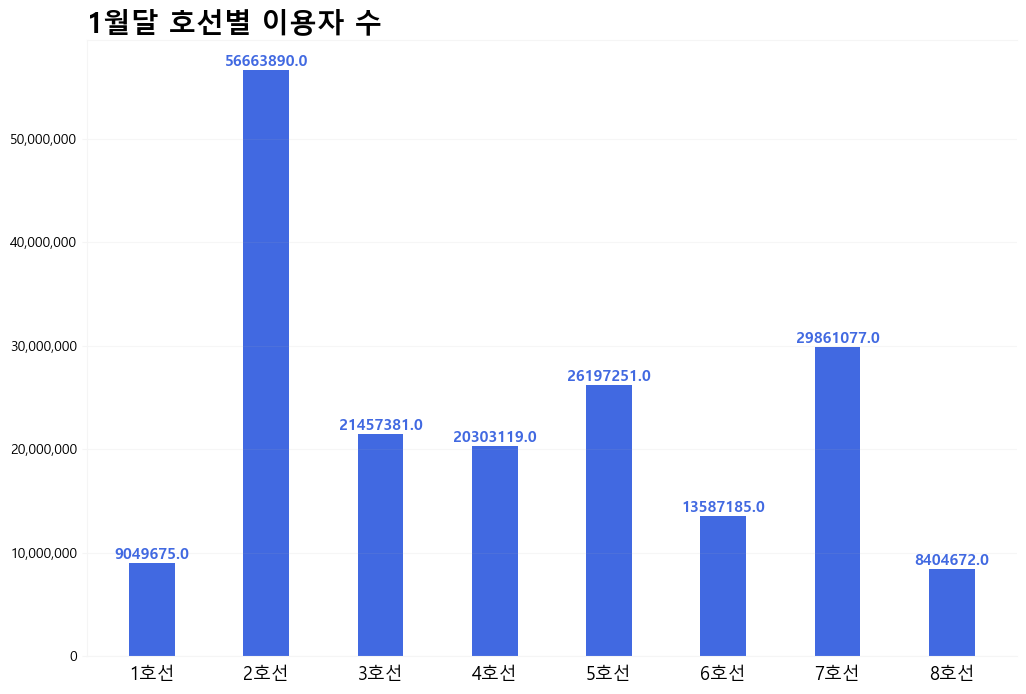

In [ ]:
# 1월달 호선별 이용자 수
january_line = january_data.groupby('line.num').sum()
print(january_line)

plt.rc('font', family='Malgun Gothic')  # 폰트
plt.rcParams['axes.unicode_minus'] = False

print(january_line.iloc[0]['people'])
y = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선']
x = np.arange(8)
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.bar(january_line.index, january_line['people'], width = 0.4, color = 'royalblue') # width : 막대 폭 지정
for i, v in enumerate(x):
    plt.text(v+1, january_line.iloc[i]['people'], january_line.iloc[i]['people'],
             fontsize = 11,
             fontweight = 'bold',
             color = 'royalblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xticks(x+1, y, fontsize = 13)
plt.grid(True, axis = 'y', alpha = 0.1)
current_values = plt.gca().get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.tick_params(bottom = False) # x축 눈금 숨기기
ax.tick_params(axis = 'y', color = 'whitesmoke')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
plt.title('1월달 호선별 이용자 수', loc = 'left', fontsize = 20, fontweight = 'bold')
plt.show()

In [ ]:
# 1월달 정차역별 이용자 수
seoul_in = seoul
HeatMap(data=january_data[['geo.latitude', 'geo.longitude', 'people']]).add_to(seoul_in)
seoul_in